In [1]:
# !pip install matplotlib

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# Load model
model = tf.keras.models.load_model("models/best_model.keras")
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
img_height, img_width = 500, 500
class_labels = ["citizenship_back", "citizenship_front", "idcard", "random"]

In [8]:
def load_and_predict(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.image.rgb_to_grayscale(img_array)
    img_array = tf.image.grayscale_to_rgb(img_array)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    class_probabilities = prediction[0]
    
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
    
    return predicted_label, class_probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


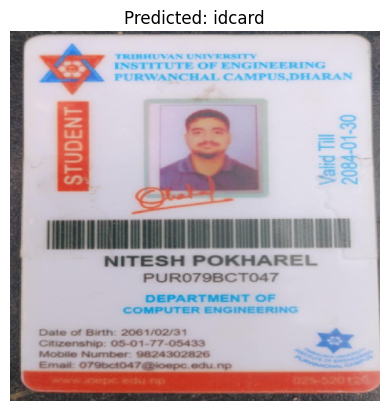

citizenship_back: 0.00
citizenship_front: 0.00
idcard: 1.00
random: 0.00


In [14]:
# Example usage:
predicted_label, class_probabilities = load_and_predict("dataset/check_image/id.png")

for i, prob in enumerate(class_probabilities):
    print(f"{class_labels[i]}: {prob:.2f}")